# Exploring E-Commerce Data with SQL and Python: A Data Wrangling and Analysis Project
This notebook contain a step of data wrangling and analysis of an E-commerce in Brazil

## Import neccessary libraries

In [87]:
#import libraries

import matplotlib.pyplot as plt #for visualization
import pandas as pd #for data manipulation
import numpy as np #for data manipulation
import seaborn as sns #for visualization
import sqlite3 #for connecting to database

import warnings #for igonoring warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Connecting the database

In [2]:
#make connection to database
database = 'database/olist.db'
conn = sqlite3.connect(database)
cursor = conn.cursor()

#load all tables from olist database
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
table_list = cursor.fetchall()

#convert to dataframe
table_list = pd.DataFrame(table_list)
table_list.columns = ['table_name']

#print table list
table_list


,table_name
0,olist_order_customer_dataset
1,olist_order_dataset
2,olist_order_reviews_dataset
3,olist_order_payments_dataset
4,olist_order_items_dataset
5,olist_products_dataset
6,olist_sellers_dataset
7,olist_geolocation_dataset
8,product_category_name_translation


In [3]:
#function for returning a data type for each column in a table
def table_info_dataframe(table_name, db_name):
    """
    This function takes in a table name and a database name and returns a dataframe with the table information.
    """
    #make connection to database
    conn = sqlite3.connect(db_name)
    c = conn.cursor()
    
    #get table info
    c.execute("PRAGMA table_info({})".format(table_name))
    table_info = c.fetchall()
    
    #close connection
    conn.close()
    
    #return information in dataframe format
    return pd.DataFrame(table_info, columns=['column_id', 'name', 'type', 'notnull', 'default_value', 'pk'])

#function for returning the data entries in a table
def table_data_dataframe(table_name, db_name):
    """
    This function takes in a table name and a database name and returns a dataframe with the table data.
    """
    #make connection to database
    conn = sqlite3.connect(db_name)
    c = conn.cursor()
    
    #get data entries from selected table
    c.execute("SELECT * FROM {}".format(table_name))
    table_data = c.fetchall()
    
    #close connection
    conn.close()
    
    #get selected table info
    table_info = table_info_dataframe(table_name, db_name)
    
    #return data entries in dataframe format
    table_data_df = pd.DataFrame(table_data, columns=table_info['name'].values)
    table_data_df.set_index('index', inplace=True) #set index column as an index 
    return table_data_df

## Checking tables column information and data entry

### Olist Orders Data

In [455]:
#checking table column information
olist_order_info_df = table_info_dataframe('olist_order_dataset', database)
olist_order_info_df

,column_id,name,type,notnull,default_value,pk
0,0,index,INTEGER,0,None,0
1,1,order_id,TEXT,0,None,0
2,2,customer_id,TEXT,0,None,0
3,3,order_status,TEXT,0,None,0
4,4,order_purchase_timestamp,TEXT,0,None,0
5,5,order_approved_at,TEXT,0,None,0
6,6,order_delivered_carrier_date,TEXT,0,None,0
7,7,order_delivered_customer_date,TEXT,0,None,0
8,8,order_estimated_delivery_date,TEXT,0,None,0


In [4]:
#load table data entries
olist_order_data_df = table_data_dataframe('olist_order_dataset', database)
olist_order_data_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
index,,,,,,,,
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00


In [457]:
olist_order_data_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


### Olist Order Customer data

In [458]:
#checking table column information
olist_order_customer_info = table_info_dataframe('olist_order_customer_dataset', database)
olist_order_customer_info

,column_id,name,type,notnull,default_value,pk
0,0,index,INTEGER,0,None,0
1,1,customer_id,TEXT,0,None,0
2,2,customer_unique_id,TEXT,0,None,0
3,3,customer_zip_code_prefix,INTEGER,0,None,0
4,4,customer_city,TEXT,0,None,0
5,5,customer_state,TEXT,0,None,0


In [5]:
#load table data entries
olist_order_customer_df = table_data_dataframe('olist_order_customer_dataset', database)
olist_order_customer_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
index,,,,,
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE


In [460]:
olist_order_customer_df.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


### Olist order Items

In [461]:
#checking table column information
olist_order_items_info = table_info_dataframe('olist_order_items_dataset', database)
olist_order_items_info

,column_id,name,type,notnull,default_value,pk
0,0,index,INTEGER,0,None,0
1,1,order_id,TEXT,0,None,0
2,2,order_item_id,INTEGER,0,None,0
3,3,product_id,TEXT,0,None,0
4,4,seller_id,TEXT,0,None,0
5,5,shipping_limit_date,TEXT,0,None,0
6,6,price,REAL,0,None,0
7,7,freight_value,REAL,0,None,0


In [6]:
#load table data entries
olist_order_items_df = table_data_dataframe('olist_order_items_dataset', database)
olist_order_items_df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
index,,,,,,,
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95


In [491]:
olist_order_items_df.describe(include='all')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,order
count,98666,98666.000000,98666,98666,98666,98666.000000,98666.000000,98666.0
unique,98666,NaN,31862,3084,93009,NaN,NaN,NaN
top,00010242fe8c5a6d1ba2dd792cb16214,NaN,99a4788cb24856965c36a24e339b6058,6560211a19b47992c3666cc44a7e94c0,2018-06-11 03:31:04,NaN,NaN,NaN
freq,1,NaN,443,1835,6,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,2016-09-19 00:15:34,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2020-04-09 22:35:08,NaN,NaN,NaN
mean,NaN,1.141731,NaN,NaN,NaN,125.883144,20.179411,1.0
std,NaN,0.538452,NaN,NaN,NaN,191.166764,15.855944,0.0
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000,1.0
25%,NaN,1.000000,NaN,NaN,NaN,41.492500,13.280000,1.0


### Olist Products

In [464]:
#checking table column information
olist_products_info = table_info_dataframe('olist_products_dataset', database)
olist_products_info

,column_id,name,type,notnull,default_value,pk
0,0,index,INTEGER,0,None,0
1,1,product_id,TEXT,0,None,0
2,2,product_category_name,TEXT,0,None,0
3,3,product_name_lenght,REAL,0,None,0
4,4,product_description_lenght,REAL,0,None,0
5,5,product_photos_qty,REAL,0,None,0
6,6,product_weight_g,REAL,0,None,0
7,7,product_length_cm,REAL,0,None,0
8,8,product_height_cm,REAL,0,None,0
9,9,product_width_cm,REAL,0,None,0


In [7]:
#load table data entries
olist_products_df = table_data_dataframe('olist_products_dataset', database)
olist_products_df

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
index,,,,,,,,,
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0


In [466]:
olist_products_df.describe(include='all')

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32341,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,NaN,NaN,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


In [7]:
#checking unique data in product_id column
unique_val = olist_products_df['product_id'].nunique()
total_entries = olist_products_df['product_id'].count()
print('There are {} unique values in the product_id column out of {} total entries.'.format(unique_val, total_entries))

There are 32951 unique values in the product_id column out of 32951 total entries.


### olist sellers table

In [241]:
#load data from olist_sellers_dataset table
seller_info = table_info_dataframe('olist_sellers_dataset', database)
seller_info

,column_id,name,type,notnull,default_value,pk
0,0,index,INTEGER,0,None,0
1,1,seller_id,TEXT,0,None,0
2,2,seller_zip_code_prefix,INTEGER,0,None,0
3,3,seller_city,TEXT,0,None,0
4,4,seller_state,TEXT,0,None,0


In [240]:
#load data from olist_sellers_dataset table
seller = table_data_dataframe('olist_sellers_dataset', database)
seller

,seller_id,seller_zip_code_prefix,seller_city,seller_state
index,,,,
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP


### Translation table

In [21]:
#load table data entries
products_translation_df = table_data_dataframe('product_category_name_translation', database)
products_translation_df

,product_category_name,product_category_name_english
index,,
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene


## Preparing and analyzing the data


### Products Analysis

#### 1. Popular product

Preparing data

In [493]:
#checking if there's any duplicated data in olis_order_items_df

#check duplicated order_id
olist_order_items_df[olist_order_items_df.duplicated(subset=['order_id'], keep=False)]


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
index,,,,,,,
13,0008288aa423d2a3f00fcb17cd7d8719,1,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2018-02-21 02:55:52,49.90,13.37
14,0008288aa423d2a3f00fcb17cd7d8719,2,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2018-02-21 02:55:52,49.90,13.37
32,00143d0f86d6fbd9f9b38ab440ac16f5,1,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10
33,00143d0f86d6fbd9f9b38ab440ac16f5,2,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10
34,00143d0f86d6fbd9f9b38ab440ac16f5,3,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10
...,...,...,...,...,...,...,...
112635,fff8287bbae429a99bb7e8c21d151c41,2,bee2e070c39f3dd2f6883a17a5f0da45,4e922959ae960d389249c378d1c939f5,2018-03-27 12:29:22,180.00,48.14
112640,fffb9224b6fc7c43ebb0904318b10b5f,1,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19
112641,fffb9224b6fc7c43ebb0904318b10b5f,2,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19


In [74]:
#preparing data for analysis

#create a query for retrieving data from database
#using 3 tables: olist_order_items_dataset, olist_products_dataset, product_category_name_translation
query = '''

        WITH product_category_price AS (
        SELECT distinct(olist_products_dataset.product_category_name) as product_category_name,
               SUM(olist_order_items_dataset.price) as total_price,
               COUNT(order_id) as total_order
        FROM olist_order_items_dataset
        JOIN olist_products_dataset
             ON olist_order_items_dataset.product_id = olist_products_dataset.product_id
        WHERE olist_order_items_dataset.order_item_id = 1 
        GROUP BY product_category_name
        ORDER BY total_price DESC
        )
       
        SELECT product_category_price.product_category_name,
               pctr.product_category_name_english as product_category_name_english, 
               total_order,
               total_price
        FROM product_category_price 
        LEFT JOIN product_category_name_translation as pctr
                   ON product_category_price.product_category_name = pctr.product_category_name

'''

#execute query
cursor.execute(query)
popular_product = cursor.fetchall()

#convert the query results to dataframe format
popular_product_df = pd.DataFrame(popular_product)
popular_product_df.columns = ['product_category_name', 'product_category_name_english' ,'total_order', 'total_sales']
popular_product_df.sort_values(by='total_order', ascending=False, inplace=True)
popular_product_df

,product_category_name,product_category_name_english,total_order,total_sales
3,cama_mesa_banho,bed_bath_table,9311,895981.89
0,beleza_saude,health_beauty,8796,1191228.87
2,esporte_lazer,sports_leisure,7681,913050.06
4,informatica_acessorios,computers_accessories,6660,779711.42
6,moveis_decoracao,furniture_decor,6355,600933.60
...,...,...,...,...
64,la_cuisine,la_cuisine,12,1890.99
71,cds_dvds_musicais,cds_dvds_musicals,12,640.00
72,fashion_roupa_infanto_juvenil,fashion_childrens_clothes,8,569.85
68,pc_gamer,None,7,1196.96


In [75]:
#checking the product category name that does not have a translation
popular_product_df[popular_product_df['product_category_name_english'].isna()]

,product_category_name,product_category_name_english,total_order,total_sales
20,None,None,1416,167409.60
62,portateis_cozinha_e_preparadores_de_alimentos,None,14,3951.00
68,pc_gamer,None,7,1196.96


In [76]:
#filling missing values in product_category_name_english column
popular_product_df.at[20, 'product_category_name_english'] = 'others'
popular_product_df.at[62, 'product_category_name_english'] = 'kitchen_dining_furniture'
popular_product_df.at[68, 'product_category_name_english'] = 'pc_gamer'

In [421]:
#checking if there are double or similiar categories
popular_product_df.product_category_name_english.unique()

array(['bed_bath_table', 'health_beauty', 'sports_leisure',
       'computers_accessories', 'furniture_decor', 'housewares',
       'watches_gifts', 'telephony', 'auto', 'toys', 'cool_stuff',
       'garden_tools', 'perfumery', 'baby', 'electronics', 'stationery',
       'fashion_bags_accessories', 'pet_shop', 'others',
       'office_furniture', 'consoles_games', 'luggage_accessories',
       'home_appliances', 'construction_tools_construction',
       'small_appliances', 'musical_instruments',
       'books_general_interest', 'home_construction', 'food',
       'furniture_living_room', 'home_confort', 'audio', 'drinks',
       'market_place', 'books_technical', 'air_conditioning',
       'kitchen_dining_laundry_garden_furniture', 'fashion_shoes',
       'home_appliances_2', 'construction_tools_lights',
       'industry_commerce_and_business', 'food_drink', 'fixed_telephony',
       'art', 'costruction_tools_garden', 'agro_industry_and_commerce',
       'computers', 'construction_tool

In [77]:
#merging similar cagtories

#change column name: home_confort to home_comfort, home_comfort_2 to home_comfort, home_appliances_2 to home_appliances, and none to others
change_name = {'home_confort':'home_comfort','home_comfort_2':'home_comfort', 'home_appliances_2':'home_appliances', None:'others'}
popular_product_df['product_category_name_english'] = popular_product_df['product_category_name_english'].replace(change_name)

#sum the values of each categories that were previously modified
popular_product_df = popular_product_df.groupby('product_category_name_english').sum().reset_index()
popular_product_df.sort_values(by='total_order', ascending=False, inplace=True)

popular_product_df


,product_category_name_english,total_order,total_sales
7,bed_bath_table,9311,895981.89
43,health_beauty,8796,1191228.87
66,sports_leisure,7681,913050.06
15,computers_accessories,6660,779711.42
39,furniture_decor,6355,600933.60
...,...,...,...
11,cds_dvds_musicals,12,640.00
51,la_cuisine,12,1890.99
29,fashion_childrens_clothes,8,569.85
59,pc_gamer,7,1196.96


Analyze data through visualization

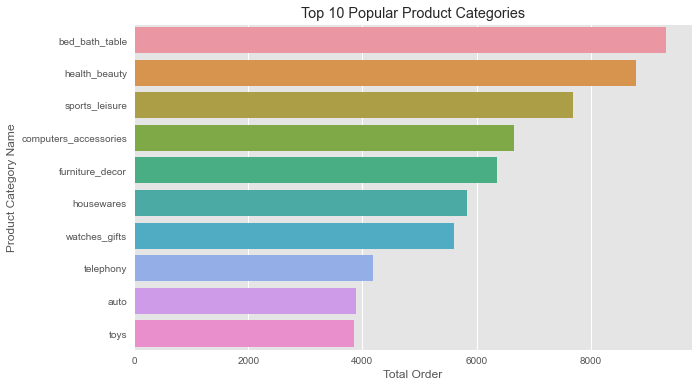

In [423]:
#plot the top 10 popular product categories
plt.figure(figsize=(10,6))
plt.style.use('ggplot')
sns.barplot(x='total_order', y='product_category_name_english', data=popular_product_df.head(10))
plt.title('Top 10 Popular Product Categories')
plt.xlabel('Total Order')
plt.ylabel('Product Category Name')
plt.show()

#### 2. Product total sales

preparing data

In [78]:
#we are using a table that has been created in the previous section
#load popular product tables and sort by total sales for each category
popular_product_df.sort_values(by='total_sales', ascending=False, inplace=True)
popular_product_df

,product_category_name_english,total_order,total_sales
43,health_beauty,8796,1191228.87
71,watches_gifts,5601,1167468.76
66,sports_leisure,7681,913050.06
7,bed_bath_table,9311,895981.89
15,computers_accessories,6660,779711.42
...,...,...,...
59,pc_gamer,7,1196.96
35,flowers,29,962.94
11,cds_dvds_musicals,12,640.00
29,fashion_childrens_clothes,8,569.85


Analyze data through visualization

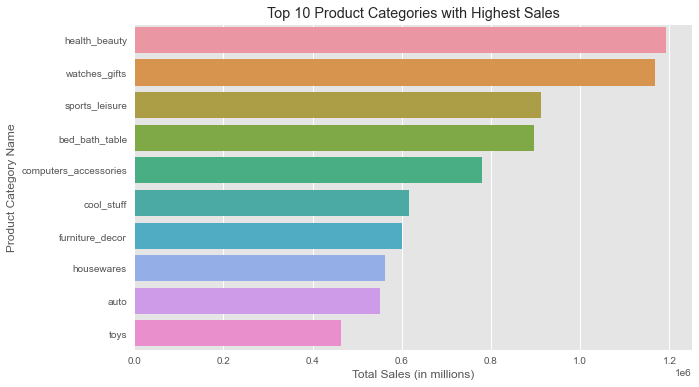

In [426]:
#plot the top 10 product categories with highest sales
plt.figure(figsize=(10,6))
plt.style.use('ggplot')
sns.barplot(x='total_sales', y='product_category_name_english', data=popular_product_df.head(10))
plt.title('Top 10 Product Categories with Highest Sales')
plt.xlabel('Total Sales (in millions)')
plt.ylabel('Product Category Name')
plt.show()


In [79]:
#adding a new column to calculate the average price of each product category
popular_product_df['product_price_average'] = popular_product_df['total_sales']/popular_product_df['total_order']

#checking the average price of each product category
popular_product_df[['product_category_name_english', 'product_price_average']].head(10)

,product_category_name_english,product_price_average
43,health_beauty,135.428475
71,watches_gifts,208.439343
66,sports_leisure,118.871249
7,bed_bath_table,96.228320
15,computers_accessories,117.073787
20,cool_stuff,170.830749
39,furniture_decor,94.560755
47,housewares,96.333258
5,auto,142.153979
70,toys,120.308638


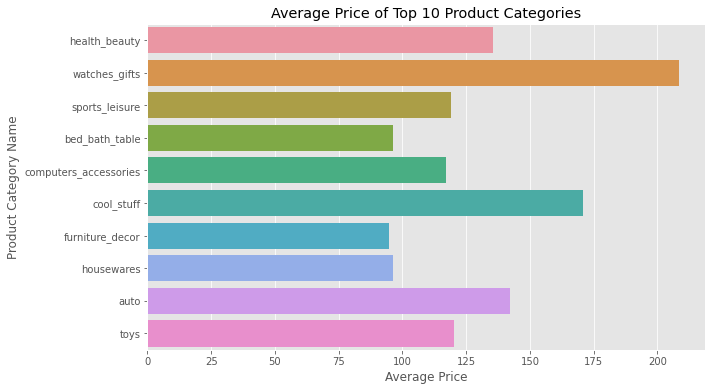

In [80]:
#visualize the average price of each product category
plt.figure(figsize=(10,6))
plt.style.use('ggplot')
sns.barplot(x='product_price_average', y='product_category_name_english', data=popular_product_df.head(10))
plt.title('Average Price of Top 10 Product Categories')
plt.xlabel('Average Price')
plt.ylabel('Product Category Name')
plt.show()

#### 3. Top 10 Product order and sales throught the year

Preparing the data

In [83]:
#create a query to retrieve data from database
#using 3 tables: olist_order_items_dataset, olist_products_dataset, product_category_name_translation
#in this query, we are adding time column to see the trend of sales
query = '''
       WITH product_category_price AS (
        SELECT DISTINCT(olist_products_dataset.product_category_name) as product_category_name,
               COUNT(olist_order_items_dataset.order_id) as total_order,
               STRFTIME("%m-%Y", shipping_limit_date) AS time,
               SUM(olist_order_items_dataset.price) as total_price
        FROM olist_order_items_dataset
        JOIN olist_products_dataset
             ON olist_order_items_dataset.product_id = olist_products_dataset.product_id
        WHERE olist_order_items_dataset.order_item_id = 1 
        GROUP BY product_category_name, time
        ORDER BY total_price DESC
        )
       
        SELECT product_category_price.product_category_name,
               pctr.product_category_name_english as product_category_name_english,
               product_category_price.time,
               total_order,
               total_price
        FROM product_category_price 
        LEFT JOIN product_category_name_translation as pctr
                   ON product_category_price.product_category_name = pctr.product_category_name

'''

#execute query
cursor.execute(query)
sales_category_trend = cursor.fetchall()

#convert the query results to dataframe format
sales_category_trend_df = pd.DataFrame(sales_category_trend, columns=['product_category_name','product_category_name_english','time','total_order','total_sales'])
sales_category_trend_df['time'] = pd.to_datetime(sales_category_trend_df['time'])
sales_category_trend_df

,product_category_name,product_category_name_english,time,total_order,total_sales
0,beleza_saude,health_beauty,2018-08-01,882,133843.11
1,relogios_presentes,watches_gifts,2018-05-01,685,128749.30
2,beleza_saude,health_beauty,2018-06-01,732,108004.29
3,beleza_saude,health_beauty,2018-03-01,681,100160.89
4,relogios_presentes,watches_gifts,2018-03-01,437,98140.87
...,...,...,...,...,...
1278,casa_conforto_2,home_comfort_2,2017-07-01,1,12.90
1279,fashion_bolsas_e_acessorios,fashion_bags_accessories,2016-12-01,1,10.90
1280,construcao_ferramentas_seguranca,construction_tools_safety,2017-08-01,1,8.90
1281,dvds_blu_ray,dvds_blu_ray,2018-08-01,1,8.90


In [84]:
#filling missing values in product_category_name_english column
for i in sales_category_trend_df[sales_category_trend_df['product_category_name_english'].isna()].index:
    if sales_category_trend_df.at[i, 'product_category_name_english'] == None and sales_category_trend_df.at[i, 'product_category_name'] == None:
        sales_category_trend_df.at[i, 'product_category_name_english'] = 'others'
    elif sales_category_trend_df.at[i, 'product_category_name_english'] == None and sales_category_trend_df.at[i, 'product_category_name'] == 'pc_gamer':
        sales_category_trend_df.at[i, 'product_category_name_english'] = 'pc_gamer'
    elif sales_category_trend_df.at[i, 'product_category_name_english'] == None and sales_category_trend_df.at[i, 'product_category_name'] == 'portateis_cozinha_e_preparadores_de_alimentos':
        sales_category_trend_df.at[i, 'product_category_name_english'] = 'kitchen_dining_furniture'
        
#map product_category_name_english
change_name = {'home_confort':'home_comfort','home_comfort_2':'home_comfort', 'home_appliances_2':'home_appliances', None:'others'}
sales_category_trend_df['product_category_name_english'] = sales_category_trend_df['product_category_name_english'].replace(change_name)

#sum home_comfort and home_comfort_2, sum home_appliances and home_appliances_2
sales_category_trend_df = sales_category_trend_df.groupby(['product_category_name_english','time']).sum().reset_index()

Analyze the data through visualization

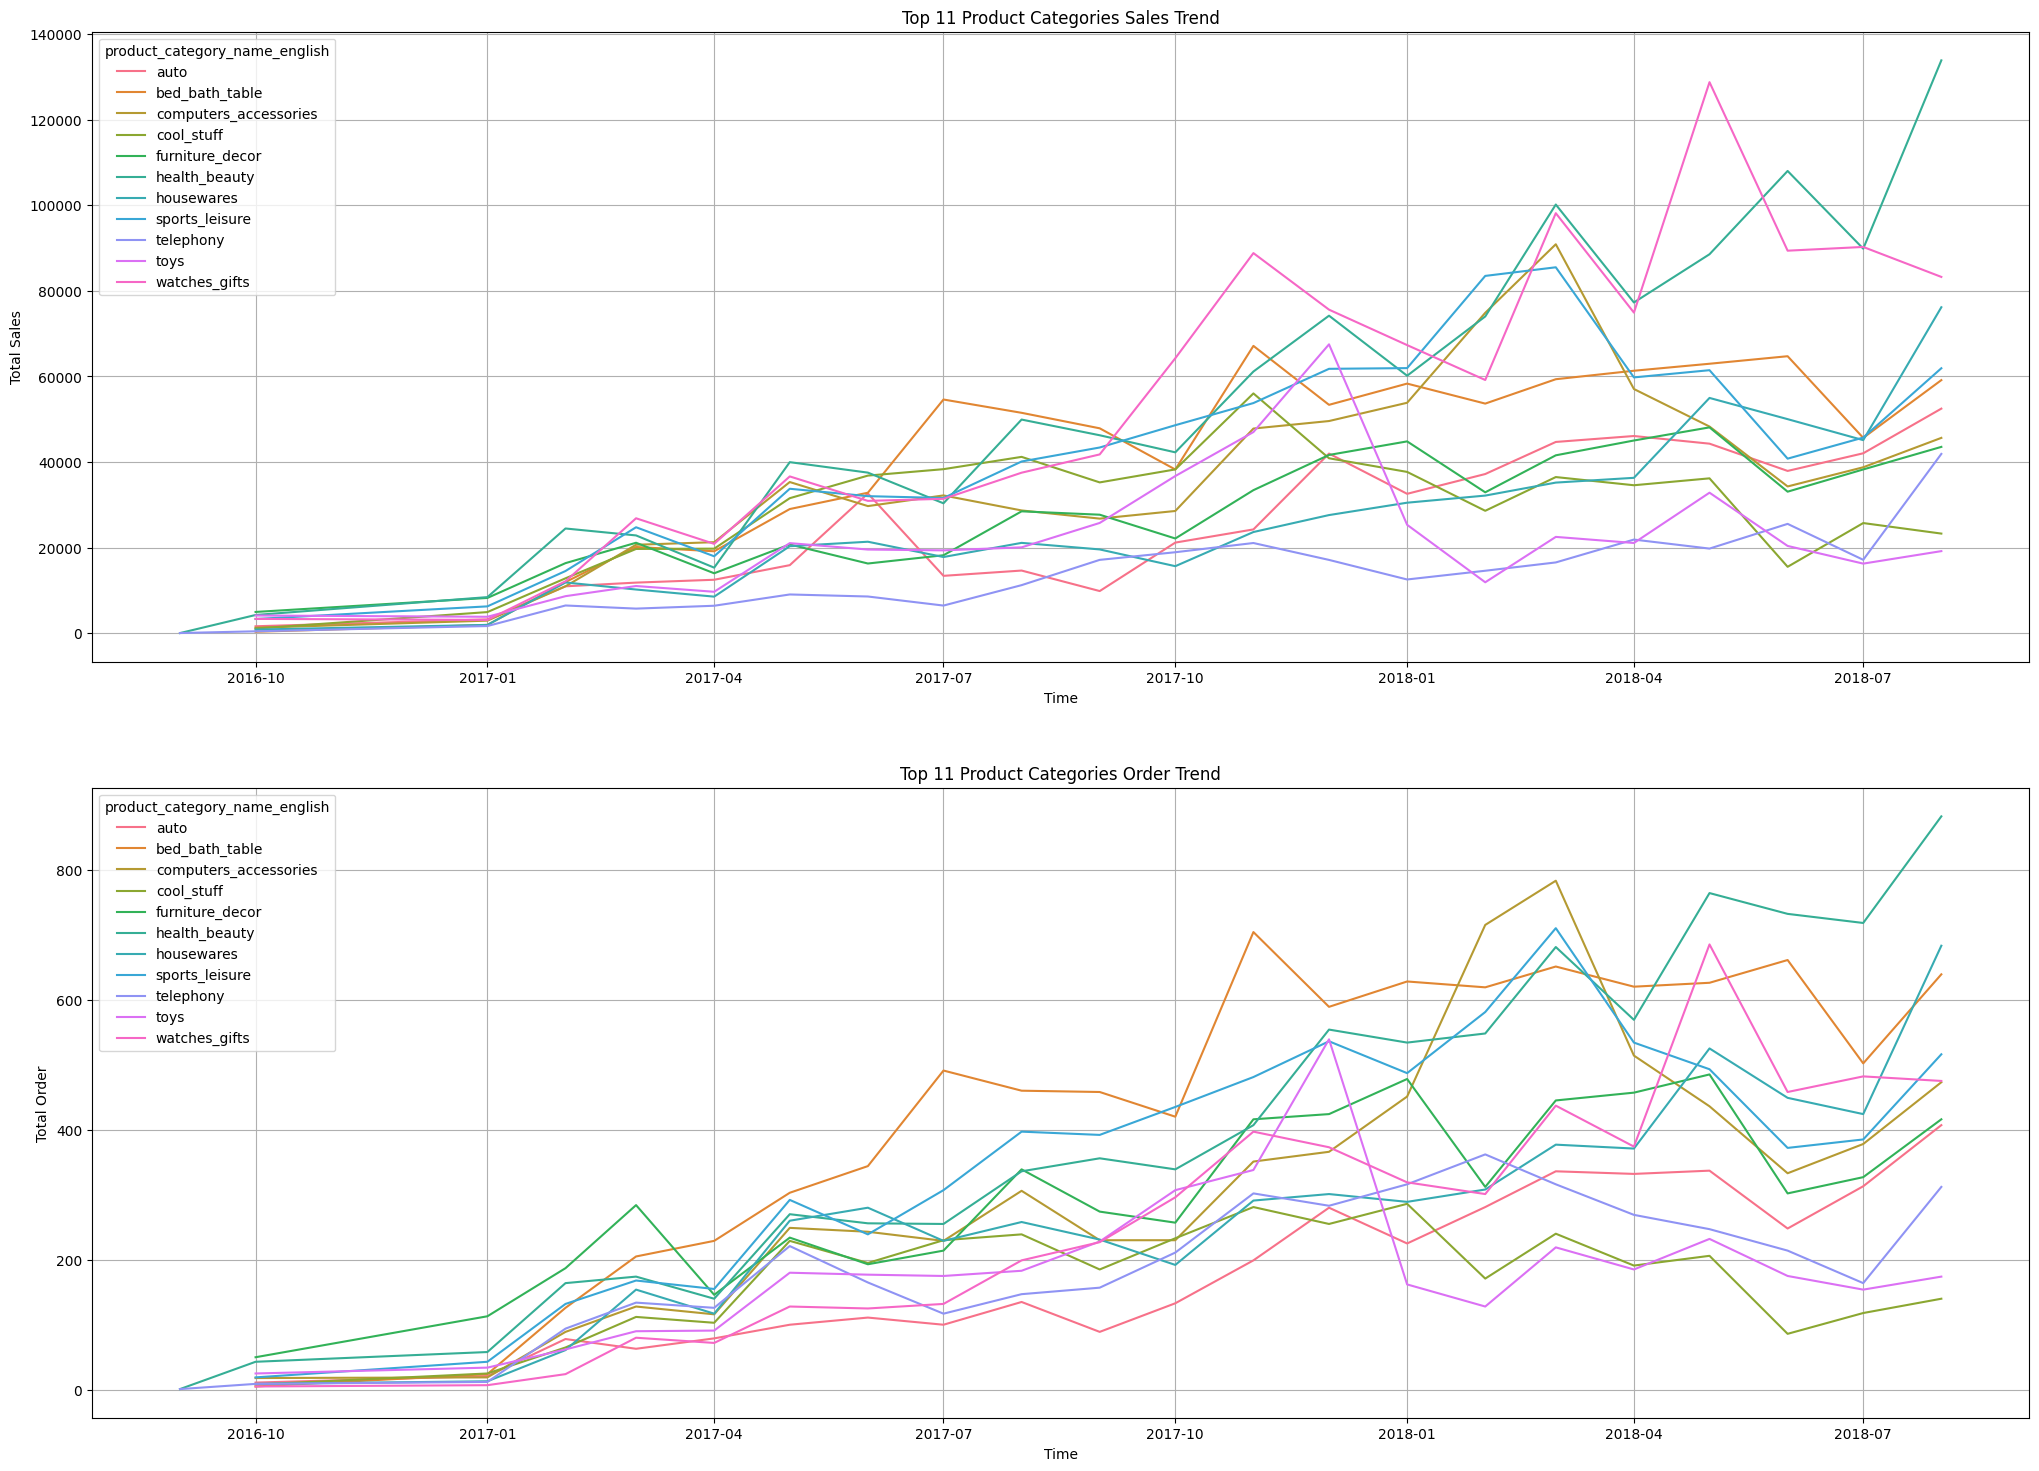

In [129]:
#plot top 11 product categories with highest sales and order through month

#set style for the chart
plt.style.use('default')

#delete data from 2019-01-01 to 2020-01-01
sales_category_trend_df = sales_category_trend_df[sales_category_trend_df['time'] < '2018-09-01']

#get top 10 product categories with highest sales
#top 10 product sales
top_10_product_sales = list(sales_category_trend_df.groupby('product_category_name_english').sum().sort_values(by='total_sales', ascending=False).head(10).index)
#add cool_stuff to the list because it is not in the top 10 product order but it is in the top 10 product sales
top_10_product_sales.append('telephony') 

#top 10 product order
top_10_product_order = list(sales_category_trend_df.groupby('product_category_name_english').sum().sort_values(by='total_order', ascending=False).head(10).index)
#add cool_stuff to the list because it is not in the top 10 product order but it is in the top 10 product sales
top_10_product_order.append('cool_stuff') 

#plot multiple chart
fig, ax = plt.subplots(2,1, figsize=(25,18))

#plot total sales trend
sns.lineplot(x='time', y='total_sales', hue='product_category_name_english', data=sales_category_trend_df[sales_category_trend_df['product_category_name_english'].isin(top_10_product_sales)], ax=ax[0])
ax[0].set_title('Top 11 Product Categories Sales Trend')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Total Sales')
ax[0].grid()

#plot total order trend
sns.lineplot(x='time', y='total_order', hue='product_category_name_english', data=sales_category_trend_df[sales_category_trend_df['product_category_name_english'].isin(top_10_product_order)], ax=ax[1])
ax[1].set_title('Top 11 Product Categories Order Trend')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Total Order')
ax[1].grid()
plt.show()

### Identifying Customer Behaviour

#### 4. Customer Order Time

Preparing the data

In [191]:
#load table data entries from database into dataframe
olist_order_data_df = table_data_dataframe('olist_order_dataset', database)

olist_order_data_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
index,,,,,,,,
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00


In [ ]:
#change order_purchase_timestamp from object to datetime format
olist_order_data_df.order_purchase_timestamp = pd.to_datetime(olist_order_data_df.order_purchase_timestamp)

Analyze the data through visualization

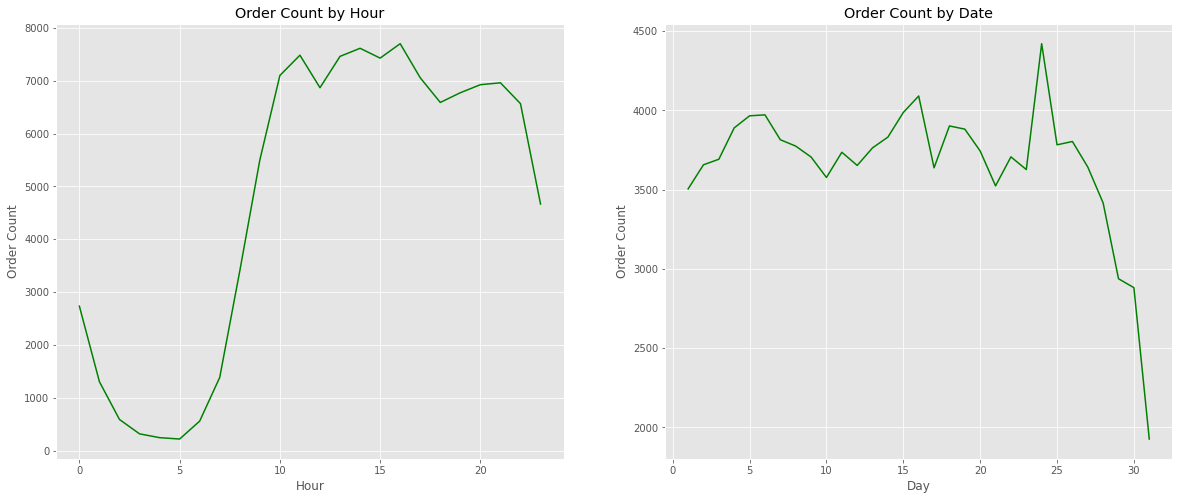

In [11]:
#plot multiple chart
fig, ax = plt.subplots(1,2, figsize=(20,8))
plt.style.use('ggplot')
#plot order count by hour
sns.lineplot(x=olist_order_data_df['order_purchase_timestamp'].dt.hour.value_counts().sort_index().index, y=olist_order_data_df['order_purchase_timestamp'].dt.hour.value_counts().sort_index().values , color = 'g', ax=ax[0])
ax[0].set_title('Order Count by Hour')
ax[0].set_xlabel('Hour')
ax[0].set_ylabel('Order Count')
#plot order count by day
sns.lineplot(x=olist_order_data_df['order_purchase_timestamp'].dt.day.value_counts().sort_index().index, y=olist_order_data_df['order_purchase_timestamp'].dt.day.value_counts().sort_index().values, color = 'g', ax=ax[1])
ax[1].set_title('Order Count by Date')
ax[1].set_xlabel('Day')
ax[1].set_ylabel('Order Count')
plt.show()

-------------

### Identifying sales and order trend per region

#### 5. Sales and order trend for each region

Preparing the data

In [200]:
#merge order data and customer data on customer_id
order_customer_df = pd.merge(olist_order_data_df, olist_order_customer_df, on='customer_id', how='left')

#drop unnecesaary columns
order_customer_df = order_customer_df.drop(order_customer_df.columns[4:10], axis=1)
order_customer_df = order_customer_df.drop(order_customer_df.columns[1:3], axis=1)

order_customer_df.head()

,order_id,order_purchase_timestamp,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,santo andre,SP


In [201]:
#add price columns to order_customer_df by merging order_customer_df and order_items_df on order_id

#drop duplicates on olist_order_items_df before merging
olist_order_items_df.drop_duplicates(subset="order_id", keep='last', inplace=True)

#merge order_customer_df and order_items_df on order_id
order_customer_sales_df = pd.merge(order_customer_df, olist_order_items_df, on='order_id', how='left')

#drop unnecesary column 
unnecesary_column = ['order_item_id', 'seller_id', 'shipping_limit_date']
order_customer_sales_df = order_customer_sales_df.drop(unnecesary_column, axis=1)

order_customer_sales_df.head()

,order_id,order_purchase_timestamp,customer_city,customer_state,product_id,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,sao paulo,SP,87285b34884572647811a353c7ac498a,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,barreiras,BA,595fac2a385ac33a80bd5114aec74eb8,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,vianopolis,GO,aa4383b373c6aca5d8797843e5594415,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,sao goncalo do amarante,RN,d0b61bfb1de832b15ba9d266ca96e5b0,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,santo andre,SP,65266b2da20d04dbe00c5c2d3bb7859e,19.90,8.72


In [214]:
#add column order
order_customer_sales_df['order'] = 1

#change order_purchase_timestamp to month-year format
order_customer_sales_df.order_purchase_timestamp = pd.to_datetime(order_customer_sales_df.order_purchase_timestamp).dt.strftime('%m-%Y')

#group sales and order data by customer_state and date
sales_and_order_trends_per_state = order_customer_sales_df.groupby(['customer_state', 'order_purchase_timestamp']).sum().reset_index()

#drop unnecesary column
sales_and_order_trends_per_state = sales_and_order_trends_per_state.drop('freight_value', axis=1)

#sort sales and order data by sales
sales_and_order_trends_per_state.columns = ['customer_state', 'date', 'sales', 'order']
sales_and_order_trends_per_state.sort_values(by='sales', ascending=False, inplace=True)
sales_and_order_trends_per_state['date'] = pd.to_datetime(sales_and_order_trends_per_state['date'])

sales_and_order_trends_per_state

,customer_state,date,sales,order
530,SP,2018-05-01,392871.21,3207
536,SP,2018-08-01,367780.56,3253
528,SP,2018-04-01,363150.88,3059
526,SP,2018-03-01,349909.01,3037
522,SP,2018-01-01,341443.35,3052
...,...,...,...,...
221,MG,2018-09-01,0.00,4
394,RJ,2018-10-01,0.00,1
391,RJ,2018-09-01,0.00,3
349,PI,2018-10-01,0.00,1


Analyze the data through visualization

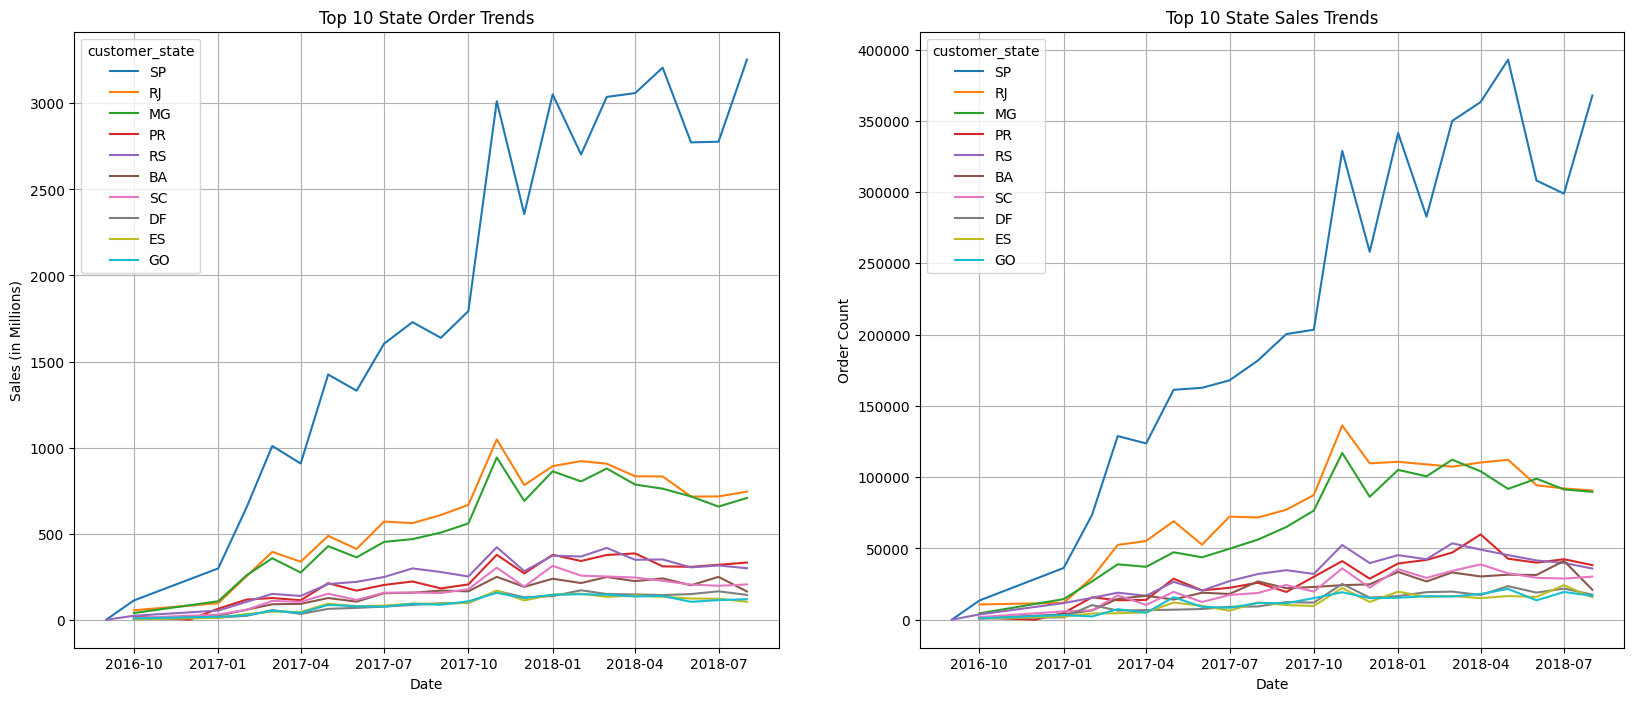

In [224]:
#delete data after 2018-08-01
sales_and_order_trends_per_state.drop(sales_and_order_trends_per_state[sales_and_order_trends_per_state.date > '2018-08-01'].index, inplace=True)

#top 10 product sales
top_10_state_sales = sales_and_order_trends_per_state.groupby('customer_state').sum().sort_values(by='sales', ascending=False).head(10).index
#top 10 product order
top_10_state_order = sales_and_order_trends_per_state.groupby('customer_state').sum().sort_values(by='order', ascending=False).head(10).index

#plot multiple chart
fig, ax = plt.subplots(1,2, figsize=(20,8))
plt.style.use('default')

#plot top sales and order trends for each customer state
sns.lineplot(x='date', y='order', hue='customer_state', data=sales_and_order_trends_per_state[sales_and_order_trends_per_state['customer_state'].isin(top_10_state_order)] , ax=ax[0])
ax[0].set_title('Top 10 State Order Trends')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Sales (in Millions)')
ax[0].grid(True)

#plot top sales and order trends for each customer state
sns.lineplot(x='date', y='sales', hue='customer_state', data=sales_and_order_trends_per_state[sales_and_order_trends_per_state['customer_state'].isin(top_10_state_sales)] , ax=ax[1])
ax[1].set_title('Top 10 State Sales Trends')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Order Count')
ax[1].grid(True)

plt.show()


checking the top 10 state with the most seller

In [238]:
#load data from olist_sellers_dataset table
seller = table_data_dataframe('olist_sellers_dataset', database)

#seller state count
seller_state_count = seller.seller_state.value_counts().head(10)

#convert into dataframe format and reset index
seller_df = pd.DataFrame(seller_state_count)
seller_df.reset_index(inplace=True)

#rename columns
seller_df.columns = ['seller_state', 'seller_count']

seller_df

,seller_state,seller_count
0,SP,1849
1,PR,349
2,MG,244
3,SC,190
4,RJ,171
5,RS,129
6,GO,40
7,DF,30
8,ES,23
9,BA,19


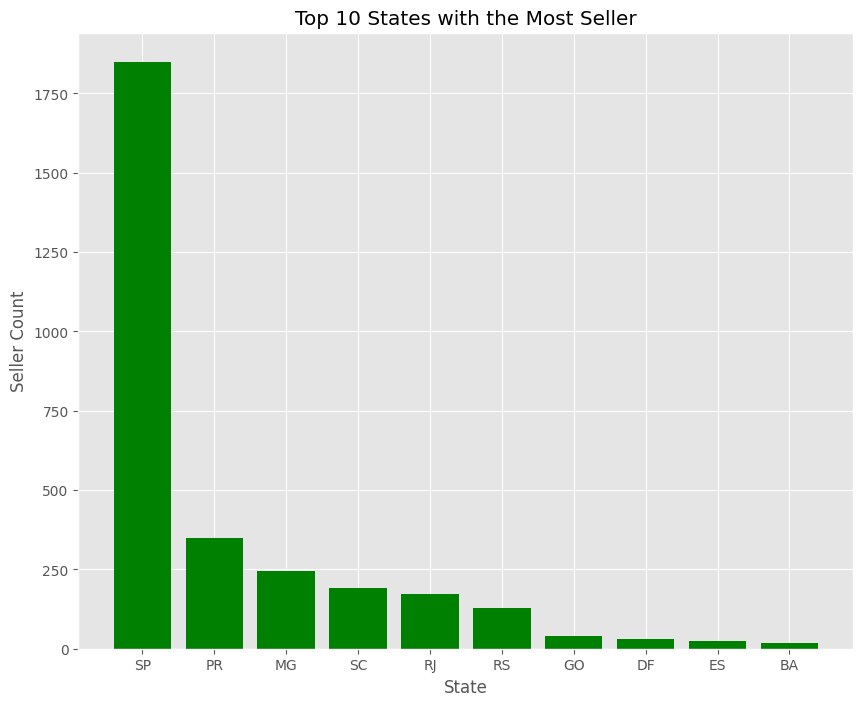

In [253]:
#plot top 10 states with the most seller 
plt.figure(figsize=(10,8))
plt.style.use('ggplot')
plt.bar(seller_df['seller_state'], seller_df['seller_count'], color='g')
plt.title('Top 10 States with the Most Seller')
plt.xlabel('State')
plt.ylabel('Seller Count')
plt.grid(True)
plt.show()


--------